# Unsupervised Learning Project: Flower Image Segmentation

**Project Description**

The goal of this project is to segment digital images of flowers into two parts: the subject (the flower or flowers) and the background. This segmentation aims to simplify image analysis by isolating the main subject from its surroundings.

**Objectives**

- Automatically segment each of the 210 images into two regions: the subject and the background.
- Work with images of 10 different species of flowering plants.
- Utilize unsupervised learning due to the absence of labeled data for segmentation.

# EDA Procedure

**Data Collection**

- The dataset comprises 210 images of flowers in .png format, sized 128x128 pixels, across 10 species.
- Labels are provided in a separate flower-labels.csv file, primarily for identification, not used in the segmentation process.

**Data Inspection**

- Inspect image resolution, color depth, and variation across the dataset.
- Identify common backgrounds and flower colors to anticipate segmentation challenges.

**Data Preprocessing**

- Images already uniform size in the dataset.
- Added a function to scale images down to size for use with other datasets.
- Normalization: Scale pixel values for use in clustering.
- Added a function to check if an image is RGB, and if not, to convert it to RGB.

**Data Visualization**

- Display a subset of images to understand the dataset's variety.
- Optionally, plot color histograms to visualize the common color distributions within the images.

# Analysis

**Model Building and Training**

**Feature Extraction**
- Directly use pixel RGB values as features for clustering.

**Model Selection**
- K-means clustering is chosen for its simplicity and effectiveness in grouping data into a specified number of clusters, in this case, two (the flower and the background).

**Hyperparameter Tuning**
- Set n_colors = 2 for K-means to segment the image into subject and background.

**Training**
- Apply K-means to each image, treating each pixel's color as a feature vector.
- Assign each pixel to one of two clusters based on its RGB values.

**Postprocessing**
- None applied; direct segmentation results are used for analysis.


# Results

**Segmentation Outputs**
- The segmented images show a clear division between the subject and background, with varying degrees of success depending on the image.
- In some cases, parts of the background with color similar to the flower may be misclassified as the subject and vice versa.

C:\Users\Victor-SexyPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


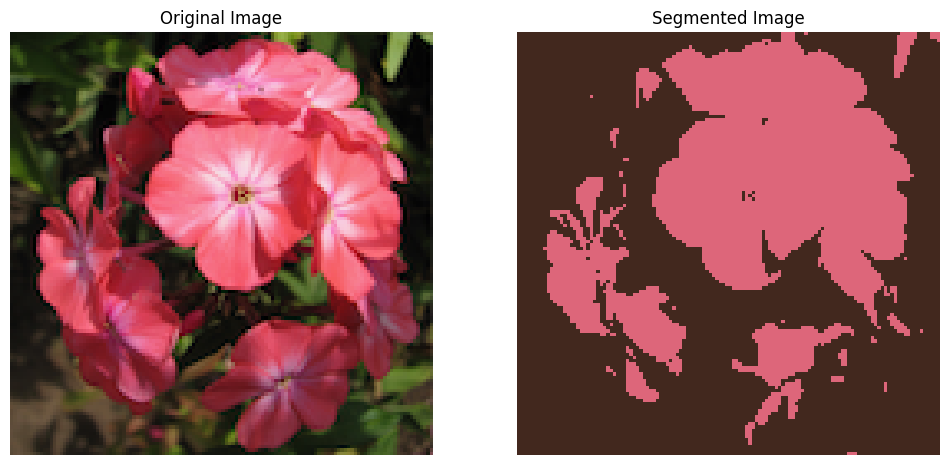

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.io import imread, imshow
from skimage.transform import resize
import os
import pandas as pd
from skimage.transform import resize
from skimage.color import rgb2gray


# Directory where images are stored
image_dir = './flower_images'

# Function to segment an image
def segment_image(image_path, n_segments=2):
    image = imread(image_path)
    # Ensure the image is resized correctly maintaining the 3 channels for RGB
    image = resize(image, (128, 128), anti_aliasing=True)
    
    # Check if the image is not RGB (i.e., grayscale or has an alpha channel) and convert it to RGB if necessary
    if image.ndim == 2 or (image.ndim == 3 and image.shape[2] == 1):  # Grayscale image
        # Convert grayscale to RGB by stacking the grayscale values along the depth
        image = np.stack((image,) * 3, axis=-1)
    elif image.ndim == 3 and image.shape[2] > 3:  # Image has more than 3 channels (e.g., RGBA)
        # Use only the first 3 channels (RGB)
        image = image[:, :, :3]

    # Flatten the image for KMeans
    image_array = image.reshape((-1, 3))
    
    # Apply KMeans to segment the image
    kmeans = KMeans(n_clusters=n_segments, random_state=0).fit(image_array)
    labels = kmeans.predict(image_array)
    
    # Create segmented image
    segmented_image = kmeans.cluster_centers_[labels].reshape((128, 128, 3))
    segmented_image = np.clip(segmented_image, 0, 1)  # Ensure the pixel values are valid
    
    return segmented_image

# Example: Segment the first image
first_image_path = os.path.join(image_dir, os.listdir(image_dir)[0])
segmented_image = segment_image(first_image_path, n_segments=2)

# Display the original and segmented image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
original_image = imread(first_image_path)
ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(segmented_image)
ax[1].set_title('Segmented Image')
ax[1].axis('off')

plt.show()

**Quantitative Analysis**
- Due to the unsupervised nature of the project, traditional quantitative metrics are challenging to apply without ground truth data for segmentation.
- Visual inspection is used to assess the segmentation quality.

# Discussion and Conclusion

**Discussion**
- The K-means algorithm successfully segmented the flower images into two distinct regions in many cases, effectively isolating the flowers from the background.
- The algorithm's performance varied with the complexity of the background and the color similarity between the subject and background.


**Conclusion**
- K-means clustering provides a simple yet effective approach for segmenting flowers from the background in images.
- The segmentation quality suggests this approach could be useful for applications needing subject isolation, such as enhancing image analysis or further processing in computer vision tasks.


**Future Work**
- Investigate advanced segmentation techniques, such as deep learning models, for improved accuracy, especially in complex scenarios.
- Explore the use of additional features (e.g., texture, shape) alongside color for clustering.
